<a href="https://colab.research.google.com/github/ShubhamGet/AndroidConcept2/blob/master/gold_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libaries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 



Data collection and processing

In [40]:
 # loading the csv data to a Pandas DataFrame
 gold_data= pd.read_csv('/content/Gold_Monthly.csv')

In [ ]:
# print first 5 row in the dataframe
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,Feb 79,271.6,271.6,271.6,271.6,-,0.0727
1,Mar 79,256.6,256.6,256.6,256.6,-,-0.0552
2,Apr 79,262.4,262.4,262.4,262.4,-,0.0226
3,May 79,290.7,290.7,290.7,290.7,-,0.1079
4,Jun 79,293.5,293.5,293.5,293.5,-,0.0096


In [ ]:
# print last 5 row from dataFrame
gold_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
510,Aug 21,1820.10,1818.60,1837.4,1680.0,35.09K,0.0005
511,Sep 21,1758.50,1818.60,1838.7,1723.7,68.13K,-0.0338
512,Oct 21,1785.90,1759.10,1817.5,1747.9,107.65K,0.0156
513,Nov 21,1776.50,1786.80,1881.9,1761.0,1.31M,-0.0053
514,Dec 21,1779.35,1775.15,1794.4,1762.3,-,0.0016


In [ ]:
# number of row and column
gold_data.shape

(515, 7)

In [ ]:
# getting some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      515 non-null    object 
 1   Price     515 non-null    float64
 2   Open      515 non-null    float64
 3   High      515 non-null    float64
 4   Low       515 non-null    float64
 5   Vol.      515 non-null    object 
 6   Change %  515 non-null    float64
dtypes: float64(5), object(2)
memory usage: 28.3+ KB


In [ ]:
# check the number of missing value 
gold_data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,Price,Open,High,Low,Change %
count,515.000000,515.000000,515.000000,515.000000,515.000000
mean,715.115437,713.269417,736.067184,693.334563,0.005166
std,495.972666,495.524157,508.665490,482.017132,0.052965
min,255.800000,255.500000,256.600000,252.500000,-0.214900
25%,355.500000,353.850000,364.650000,344.100000,-0.026800
50%,415.900000,416.400000,430.500000,403.900000,0.000300
75%,1211.350000,1216.950000,1248.200000,1191.800000,0.031750
max,2026.900000,2098.500000,2121.700000,1958.300000,0.277200


Correlation:

    Positive Correlation
    Negative Correlation

In [ ]:
correlation = gold_data.corr()

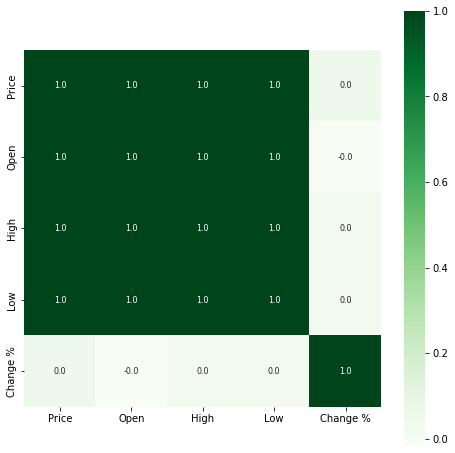

In [45]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [ ]:
# correlation values of price
print(correlation['Price'])

Price       1.000000
Open        0.996484
High        0.997961
Low         0.998157
Change %    0.046683
Name: Price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


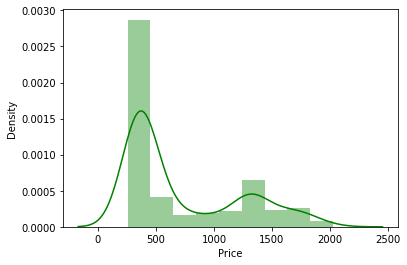

In [ ]:
# checking the distribution of the Price
sns.distplot(gold_data['Price'],color='green')

Splitting the Features and Target

In [57]:
Left = gold_data.drop(['Date','Price'],axis=1)
Right = gold_data['Price']

In [68]:
print(Left)

        Open    High     Low     Vol.  Change %
0     271.60   271.6   271.6        -    0.0727
1     256.60   256.6   256.6        -   -0.0552
2     262.40   262.4   262.4        -    0.0226
3     290.70   290.7   290.7        -    0.1079
4     293.50   293.5   293.5        -    0.0096
..       ...     ...     ...      ...       ...
510  1818.60  1837.4  1680.0   35.09K    0.0005
511  1818.60  1838.7  1723.7   68.13K   -0.0338
512  1759.10  1817.5  1747.9  107.65K    0.0156
513  1786.80  1881.9  1761.0    1.31M   -0.0053
514  1775.15  1794.4  1762.3        -    0.0016

[515 rows x 5 columns]


In [59]:
print(Right)

0       271.60
1       256.60
2       262.40
3       290.70
4       293.50
        ...   
510    1820.10
511    1758.50
512    1785.90
513    1776.50
514    1779.35
Name: Price, Length: 515, dtype: float64


Splitting into Training data and Test Data

In [60]:
Left_train, Left_test, Right_train, Rigth_test = train_test_split(Left, Right, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [61]:
regressor = RandomForestRegressor(n_estimators=100)

In [64]:
# training the model
regressor.fit(Left_train,Right_train)

ValueError: ignored